In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

sns.set(style="darkgrid")
pd.set_option("display.precision", 10)

# Mengambil directory dan input file awal

In [138]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, 'input')
output_dir = os.path.join(cwd, 'output')
features = os.path.join(output_dir, 'features_without_high_correlated_value.csv')
features_performance = os.path.join(output_dir, 'features_performance_with_estimators.csv')

In [139]:
df = pd.read_csv(features_performance)

In [140]:
df

,number_of_features,estimators,accuracy_score,confusion_matriks
0,1,10 Trees,0.8362204724,[[245 16 0]\n [ 35 237 12]\n [ 0 41 49]]
1,2,10 Trees,0.9102362205,[[255 6 0]\n [ 36 237 11]\n [ 0 4 86]]
2,3,10 Trees,0.9291338583,[[252 9 0]\n [ 21 254 9]\n [ 0 6 84]]
3,4,10 Trees,0.9527559055,[[255 6 0]\n [ 18 261 5]\n [ 0 1 89]]
4,5,10 Trees,0.9527559055,[[255 6 0]\n [ 16 261 7]\n [ 0 1 89]]
...,...,...,...,...
1065,103,100 Trees,0.9889763780,[[259 2 0]\n [ 5 279 0]\n [ 0 0 90]]
1066,104,100 Trees,0.9842519685,[[258 3 0]\n [ 7 277 0]\n [ 0 0 90]]
1067,105,100 Trees,0.9858267717,[[260 1 0]\n [ 7 277 0]\n [ 1 0 89]]
1068,106,100 Trees,0.9874015748,[[259 2 0]\n [ 6 278 0]\n [ 0 0 90]]


In [98]:
estimators = df['estimators'].unique()
estimators_split = np.split(estimators, 2)

estimators_split

[array(['10 Trees', '20 Trees', '30 Trees', '40 Trees', '50 Trees'],
       dtype=object),
 array(['60 Trees', '70 Trees', '80 Trees', '90 Trees', '100 Trees'],
       dtype=object)]

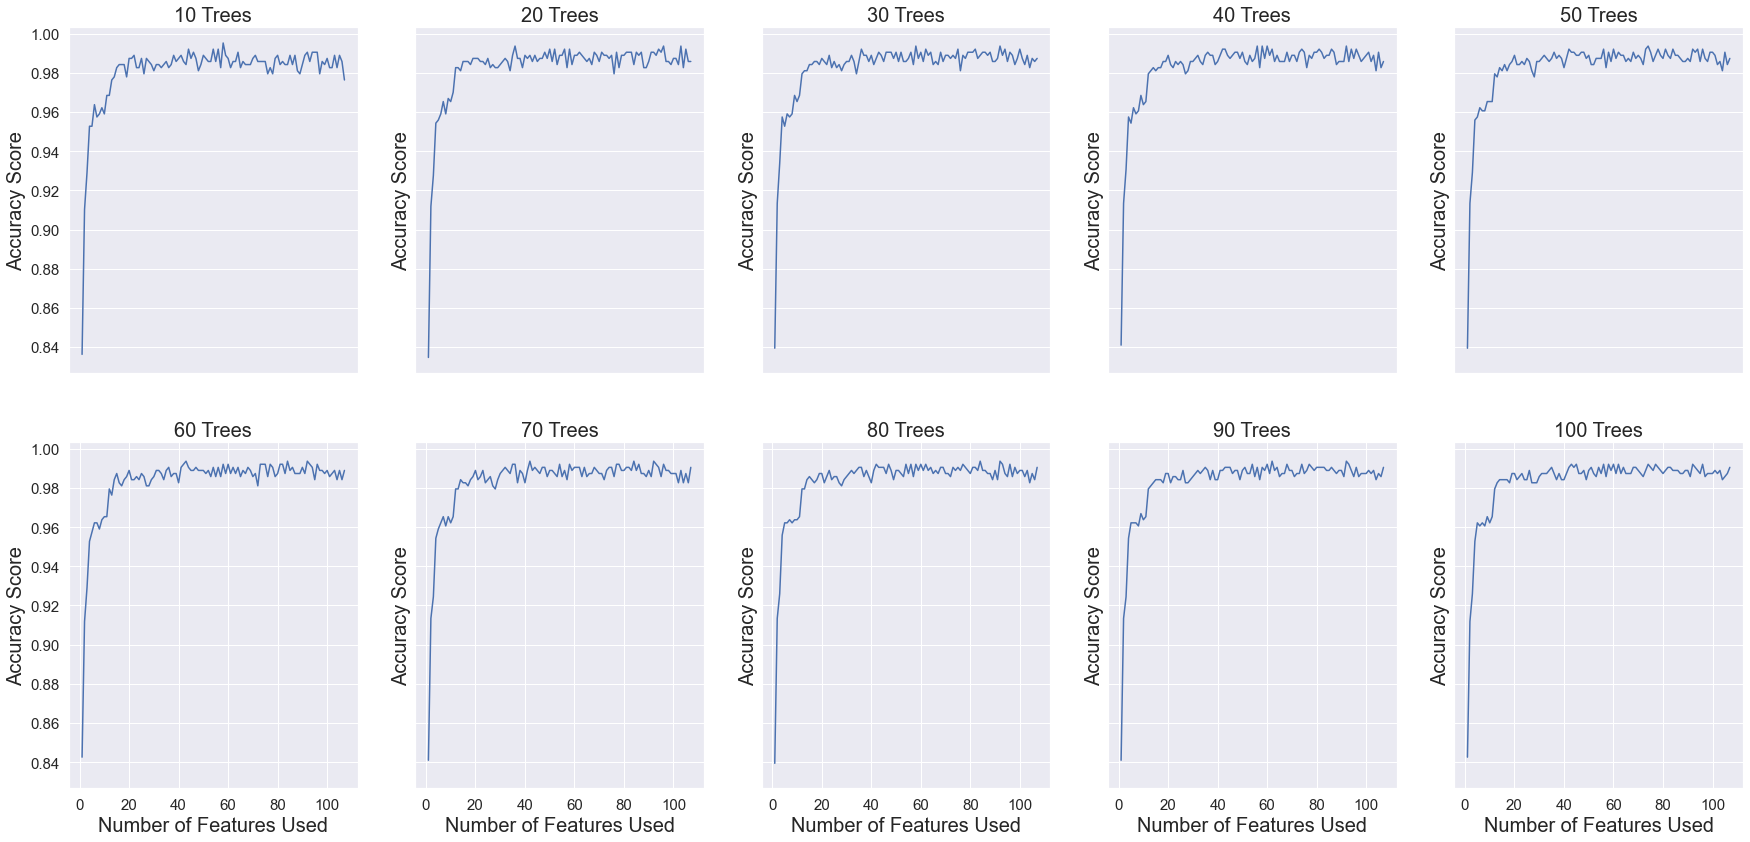

In [99]:
nrows = len(estimators_split)
ncols = len(estimators_split[0])
filename = os.path.join(output_dir, 'features_performance_per_estimators.tiff')

fig, ax = plt.subplots(
    figsize=(30, 14), 
    ncols=ncols, 
    nrows=nrows, 
    sharey=True,
)

for row in range(nrows):
    for col in range(ncols):
        ax[row][col].set_title(estimators_split[row][col], fontsize=20)
        if row == 1:
            ax[row][col].set_xlabel('Number of Features Used', fontsize=20)
        else:
            ax[row][col].get_xaxis().set_visible(False)
        ax[row][col].set_ylabel('Accuracy Score', fontsize=20)
        ax[row][col].tick_params(axis='both', which='major', labelsize=15)
        sns.lineplot(x='number_of_features', y='accuracy_score', data=df[df['estimators'] == estimators_split[row][col]], ax=ax[row][col])
        
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

In [127]:
def get_stats(dataframe, estimator):
    maximum = dataframe[dataframe['estimators'] == estimator]['accuracy_score'].max()
    minimum = dataframe[dataframe['estimators'] == estimator]['accuracy_score'].min()
    precision = maximum - minimum
    return [estimator, maximum, minimum, precision]

In [128]:
result = []

for estimator in estimators:
    result.append(get_stats(df, estimator))

In [129]:
result = pd.DataFrame(result, columns=['estimators','maximum_accuracy','minimum_accuracy','precision'])

In [130]:
result

,estimators,maximum_accuracy,minimum_accuracy,precision
0,10 Trees,0.9952755906,0.8362204724,0.1590551181
1,20 Trees,0.9937007874,0.8346456693,0.1590551181
2,30 Trees,0.9937007874,0.8393700787,0.1543307087
3,40 Trees,0.9937007874,0.8409448819,0.1527559055
4,50 Trees,0.9937007874,0.8393700787,0.1543307087
5,60 Trees,0.9937007874,0.8425196850,0.1511811024
6,70 Trees,0.9937007874,0.8409448819,0.1527559055
7,80 Trees,0.9937007874,0.8393700787,0.1543307087
8,90 Trees,0.9937007874,0.8409448819,0.1527559055
9,100 Trees,0.9921259843,0.8425196850,0.1496062992


In [131]:
result['maximum_accuracy'].max()

0.9952755905511812

In [132]:
result['maximum_accuracy'].min()

0.9921259842519684

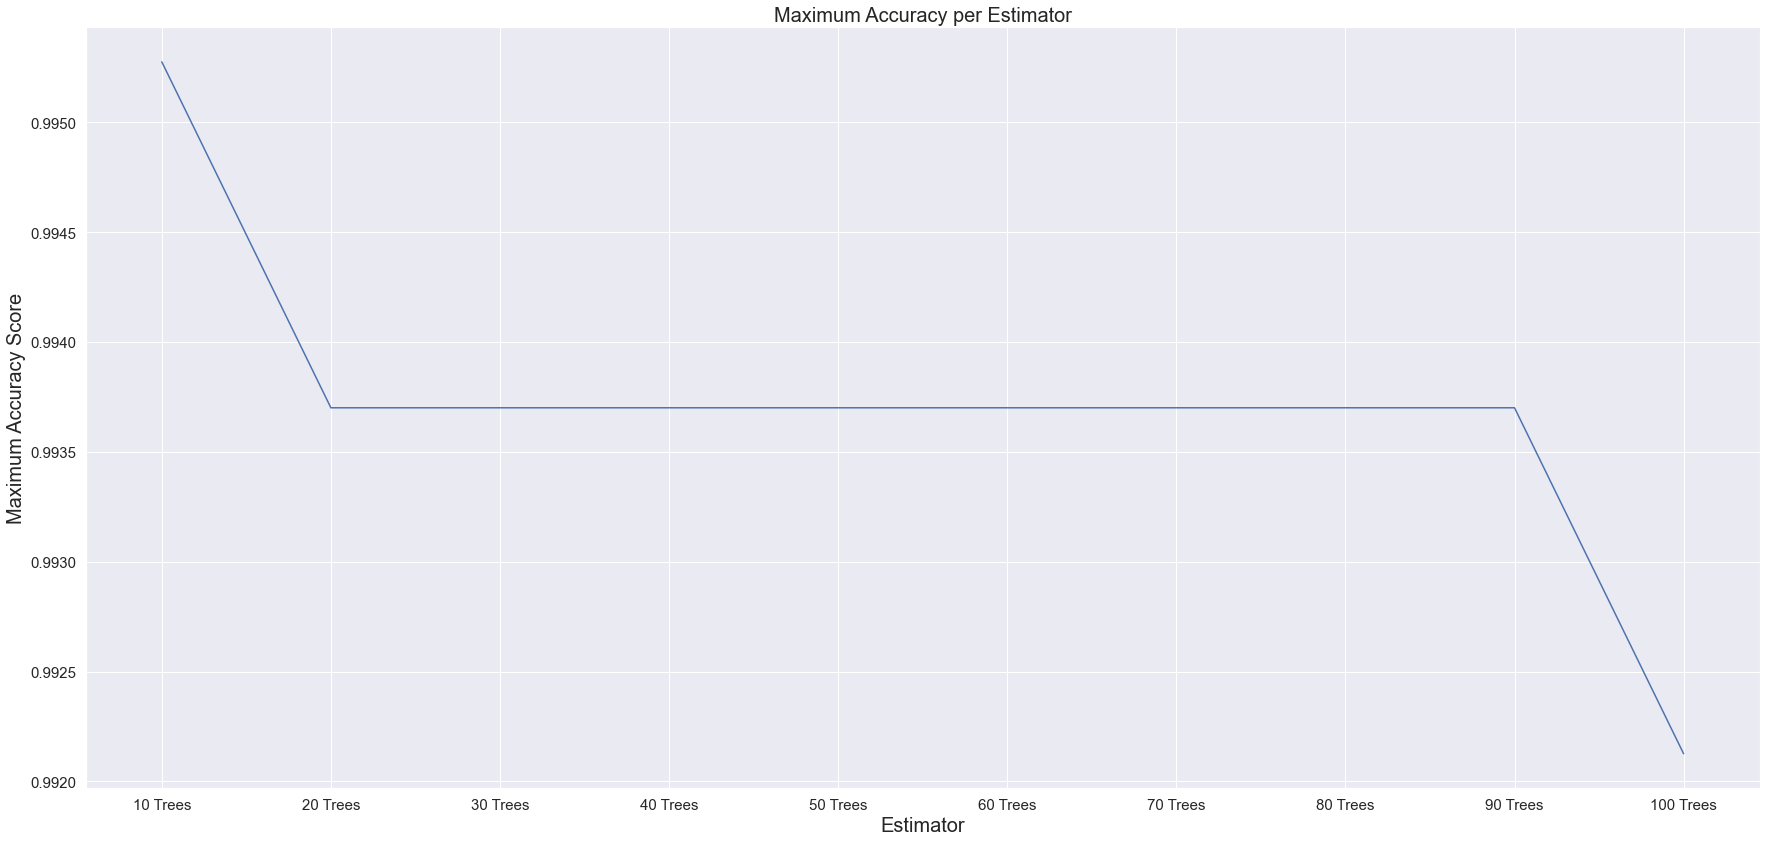

In [133]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_maximum.tiff')

ax = sns.lineplot(
    x='estimators', 
    y='maximum_accuracy', 
    data=result,
)

ax.set_title('Maximum Accuracy per Estimator', fontsize=20)
ax.set_xlabel('Estimator', fontsize=20)
ax.set_ylabel('Maximum Accuracy Score', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

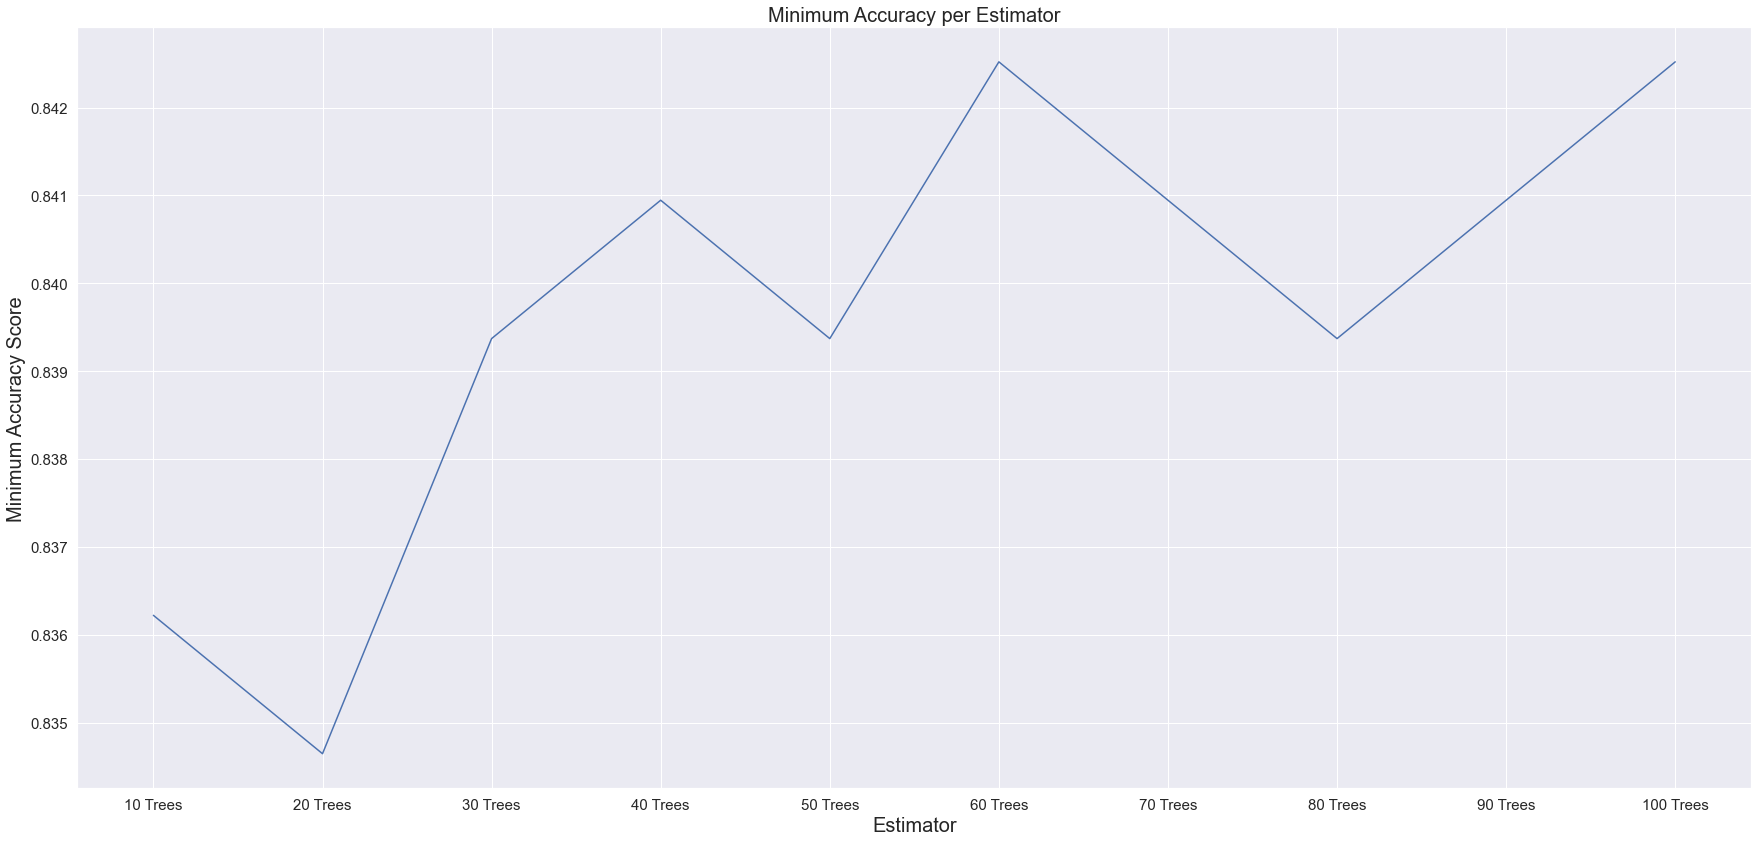

In [134]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_minimum.tiff')

ax = sns.lineplot(
    x='estimators', 
    y='minimum_accuracy', 
    data=result,
)

ax.set_title('Minimum Accuracy per Estimator', fontsize=20)
ax.set_xlabel('Estimator', fontsize=20)
ax.set_ylabel('Minimum Accuracy Score', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()

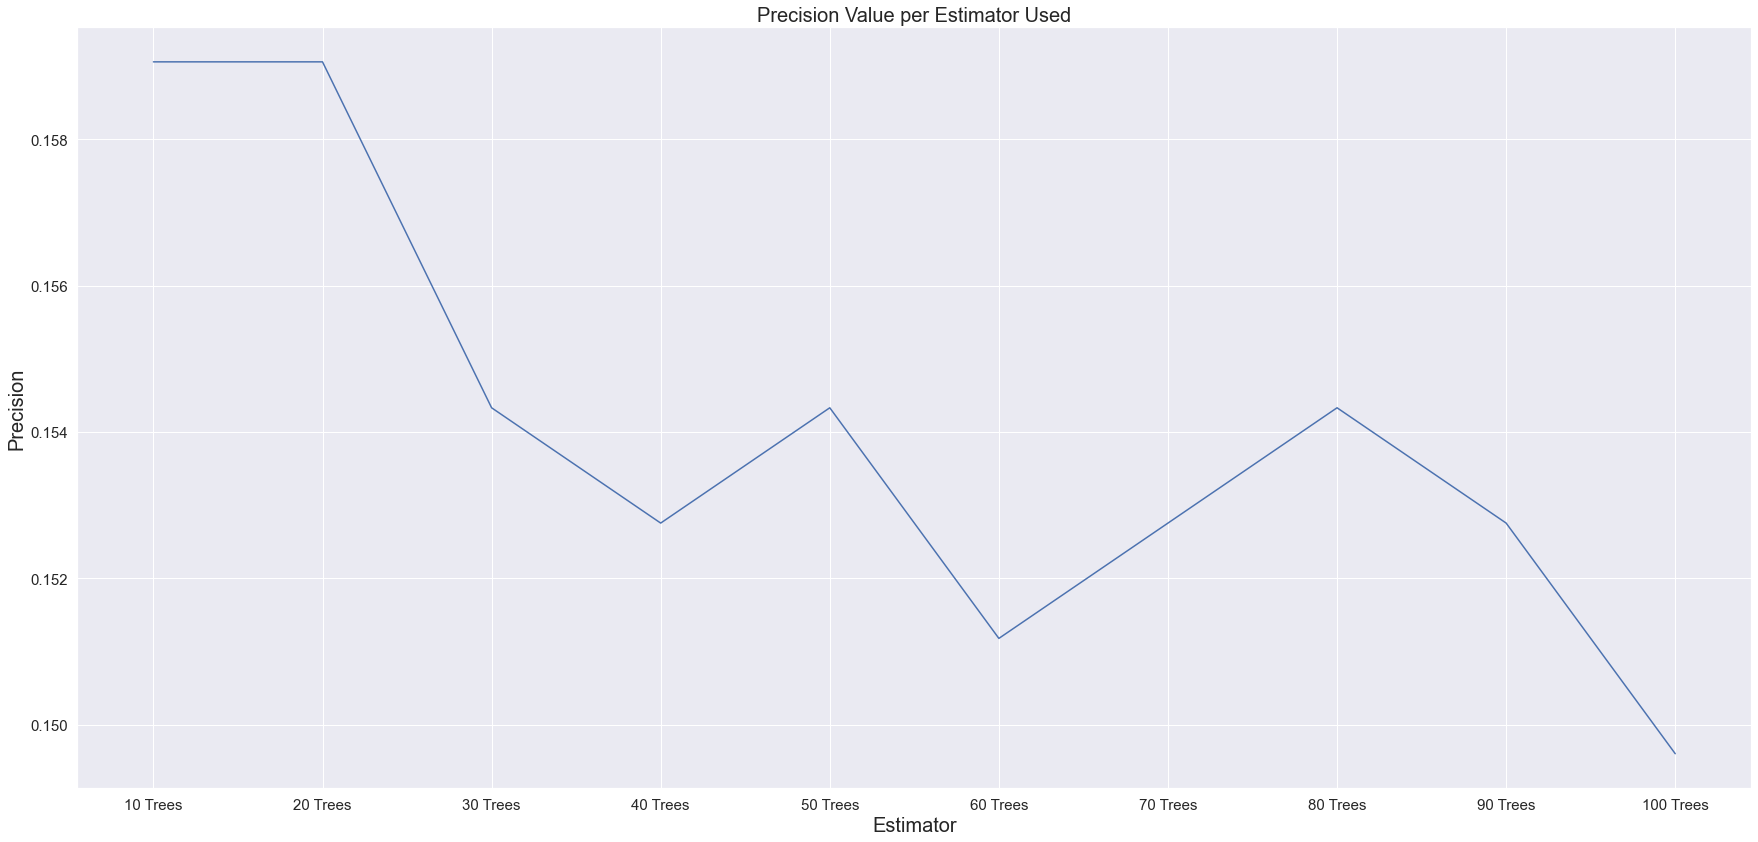

In [136]:
f, ax = plt.subplots(figsize=(30, 14))
filename = os.path.join(output_dir, 'features_performance_with_estimators_precision.tiff')

ax = sns.lineplot(
    data = result, 
    x = "estimators", 
    y = "precision",
)

ax.set_title('Precision Value per Estimator Used', fontsize=20)
ax.set_xlabel('Estimator', fontsize=20)
ax.set_ylabel('Precision', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig(filename, dpi=150, bbox_inches='tight')
plt.show()